In [10]:
import fasttext
import pandas as pd
import matplotlib.pyplot as plt
# Load the pre-trained model
model_path = "./utility/lid.176.bin"  # Make sure to download this model and update the path
model = fasttext.load_model(model_path)


In [11]:
def is_azeri_fasttext(text):
    # Convert text to string to handle any non-string data types
    text = str(text)

    # Clean the text by replacing newline characters
    text = text.replace("\n", " ").replace("\r", " ")

    # Ensure the text is a single line and not empty
    if text.strip() == "":
        return False
    # Predict the language of the text
    predictions = model.predict(text, k=1)  # k=1 returns the top 1 prediction
    lang = predictions[0][0].split("__")[-1]  # language code (e.g., 'az')
    return lang == "az"

In [12]:
def clean_and_filter_data(data_path):
    """Loads the dataset, cleans the content, filters for Azerbaijani text, and returns the DataFrame.

    Args:
        data_path (str): Path to the CSV file.
        model (fasttext.FastText): Pre-trained FastText model.

    Returns:
        pandas.DataFrame: The cleaned and filtered DataFrame.
    """

    # Load your data
    df = pd.read_csv(data_path)

    # Display the first few rows (optional)
    print(df.head())

    # Get dataset information (optional)
    print(df.info())

    # Check for missing values
    print(df.isnull().sum())

    # Handle missing values
    df = df.dropna()  # Drop rows with missing values

    # Optionally, fill missing values with 0 or median:
    df["score"] = df["score"].fillna(0)  # Assuming 0 makes sense
    df["upvotes"] = df["upvotes"].fillna(df["upvotes"].median())  # Using the median

    # Convert 'score' and 'upvotes' to integers
    df["score"] = df["score"].astype(int)
    df["upvotes"] = df["upvotes"].astype(int)

    # Outlier handling (basic percentile-based removal)
    high_quantile = df["score"].quantile(0.95)
    df = df[df["score"] < high_quantile]

    # Text cleaning
    df["content"] = df["content"].str.strip()  # Remove leading/trailing whitespace
    df["content"] = (
        df["content"].str.replace("\n", " ").replace("\r", " ")
    )  # Remove newlines
    df["content"] = df["content"].str.replace(
        "[^\w\s]", "", regex=True
    )  # Remove special chars
    df["content"] = df["content"].str.lower()  # Convert to lowercase

    # Filter for Azerbaijani text
    df["is_azeri"] = df["content"].apply(is_azeri_fasttext)
    df_filtered = df[df["is_azeri"]]

    # Optionally, drop the 'is_azeri' column if not needed
    # df_filtered = df_filtered.drop(columns="is_azeri")

    return df_filtered

<>:45: SyntaxWarning: invalid escape sequence '\w'
<>:45: SyntaxWarning: invalid escape sequence '\w'
/var/folders/w5/4gx0xffn7z9dvl1jgfj8slr00000gn/T/ipykernel_3297/602832181.py:45: SyntaxWarning: invalid escape sequence '\w'
  "[^\w\s]", "", regex=True


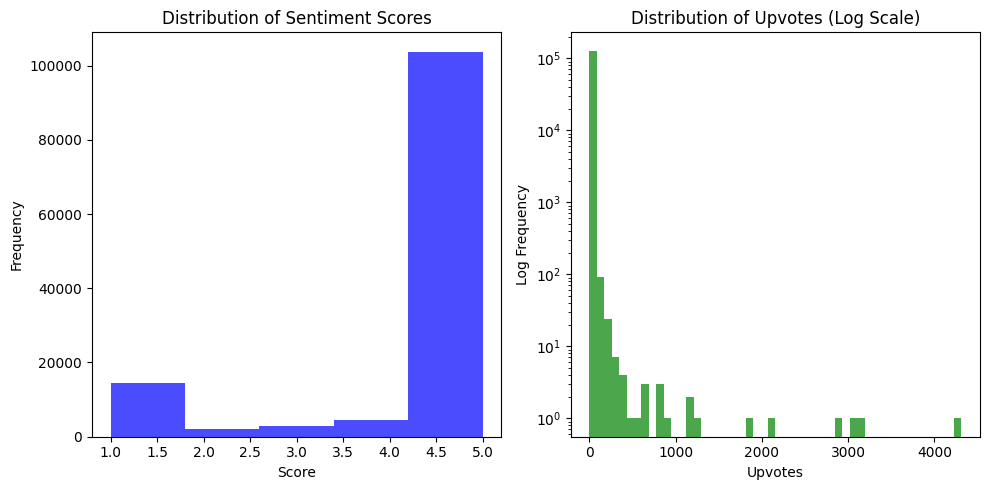

In [13]:
# Load the data
data = pd.read_csv('./utility/azarbeijan-reviews.csv')

# Remove rows where the 'content' column is null
data_cleaned = data.dropna(subset=['content'])

# Plotting the distribution of sentiment scores
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # This creates the first subplot in a 1x2 grid
plt.hist(data_cleaned['score'], bins=5, color='blue', alpha=0.7)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Plotting the distribution of upvotes using a log scale
plt.subplot(1, 2, 2)  # This creates the second subplot in the same grid
plt.hist(data_cleaned['upvotes'], bins=50, color='green', alpha=0.7, log=True)
plt.title('Distribution of Upvotes (Log Scale)')
plt.xlabel('Upvotes')
plt.ylabel('Log Frequency')

plt.tight_layout()  # This adjusts the plots to fit into the figure area.
plt.show()  # Display the plots